<a href="https://colab.research.google.com/github/JessicaAHS/hello-world/blob/master/Presi%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Media por cálculo:	120.2 [mmHg], 	numpy: 120.1 [mmHg]
Desciavión estándar: 	2.0 [mmHg], 	numpy: 2.0 [mmHg]
Varianza por cálculo: 	4.0 [mmHg], 	numpy: 4.0 [mmHg]


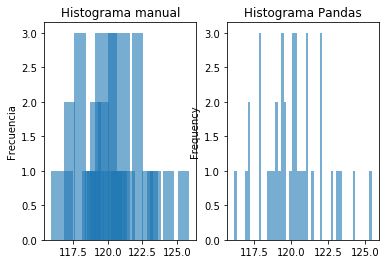

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

N = 40 #Número de pacientes
presion = np.round(np.random.normal(loc=120, scale=2.5, size=N), decimals=1) #Distribución normal -> Gaussiana

paciente = np.arange(N) + 1 #Identificación de cada paciente

data = pd.DataFrame ({'Presión':presion, 'Paciente':paciente}) #Datos en un DataFrame de Pandas
#data.to.clipboard() #Con este comand se dejan los datos en el clipboard y pueden ser pegados con otra app

plt.figure()
plt.subplot(121)
### Histograma manual ###
bandas = 9
deltaB = (presion.max() - presion.min())/np.float(bandas)

x = []
ys = np.zeros(bandas)

x0 = presion.min()
for k in range (bandas):
  xk = presion.min() + (k+1)*deltaB
  ys[k] = np.sum((presion >= x0) & (presion < xk))
  x.append(xk)
  x0 = xk
ys[-1] += np.sum(presion == presion.max()) 

plt.bar(x, ys, alpha=0.6)
plt.ylabel('Frecuencia')
plt.title('Histograma manual')
#############

plt.subplot(122)
ax = plt.gca()
#### Histograma con Pandas ####
data['Presión'].plot.hist(bins=bandas, alpha=0.6, ax = ax)
plt.title('Histograma Pandas')

### Calculo de media ###
p = ys / np.float(N) #Probabilidad para cada banda
media_calculo = np.sum(x*p)
media_numpy = presion.mean()

varianza_calculo = np.sum((x - media_calculo)**2 * p)
varianza_numpy = presion.var()

std_calculo = np.sqrt(varianza_calculo)
std_numpy = presion.std()
print('Media por cálculo:\t%0.1f [mmHg], \tnumpy: %0.1f [mmHg]' % (media_calculo, media_numpy))
print('Desciavión estándar: \t%0.1f [mmHg], \tnumpy: %0.1f [mmHg]' % (std_calculo, std_numpy))
print('Varianza por cálculo: \t%0.1f [mmHg], \tnumpy: %0.1f [mmHg]' % (varianza_calculo, varianza_numpy))